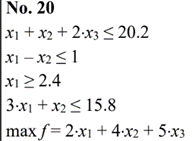

- Solve a discrete optimization problem using the branch and bound method.
- In all tasks x1, x2, x3 >= 0.


In [ ]:
import numpy as np
from scipy.optimize import linprog

objective_coeffs = [-2, -4, -5]

constraints_coeffs = [
    [1, 1, 2],
    [1, -1, 0],
    [-1, 0, 0],
    [3, 1, 0]
]

rhs_constraints = [20.2, 1, -2.4, 15.8]

# Bounds for the variables
variable_bounds = [(0, None), (0, None), (0, None)]

In [ ]:
def solve_relaxed(objective_coeffs, constraints_coeffs, rhs_constraints, variable_bounds):
    result = linprog(objective_coeffs, A_ub=constraints_coeffs, b_ub=rhs_constraints, bounds=variable_bounds, method='highs')
    return result

def branch_and_bound(objective_coeffs, constraints_coeffs, rhs_constraints, variable_bounds):
    # Solve the relaxed problem
    result = solve_relaxed(objective_coeffs, constraints_coeffs, rhs_constraints, variable_bounds)

    # If the result is not feasible, return
    if not result.success:
        return None, None

    # Check if the solution is already integer
    if all(np.floor(result.x) == result.x):
        return result.fun, result.x.astype(int)

    # Initialize the best solution found so far
    best_value = float('inf')
    best_solution = None

    # Initialize the list of subproblems to solve
    subproblems = [(result.fun, result.x, variable_bounds)]

    while subproblems:
        # Get the next subproblem
        current_value, current_solution, current_bounds = subproblems.pop(0)

        # Find the first non-integer variable
        for i in range(len(current_solution)):
            if np.floor(current_solution[i]) != current_solution[i]:
                break

        # Create two new subproblems by branching on this variable
        new_bounds1 = current_bounds.copy()
        new_bounds1[i] = (current_bounds[i][0], np.floor(current_solution[i]))
        new_result1 = solve_relaxed(objective_coeffs, constraints_coeffs, rhs_constraints, new_bounds1)

        if new_result1.success and new_result1.fun < best_value:
            if all(np.floor(new_result1.x) == new_result1.x):
                best_value = new_result1.fun
                best_solution = new_result1.x.astype(int)
            else:
                subproblems.append((new_result1.fun, new_result1.x, new_bounds1))

        new_bounds2 = current_bounds.copy()
        new_bounds2[i] = (np.ceil(current_solution[i]), current_bounds[i][1])
        new_result2 = solve_relaxed(objective_coeffs, constraints_coeffs, rhs_constraints, new_bounds2)

        if new_result2.success and new_result2.fun < best_value:
            if all(np.floor(new_result2.x) == new_result2.x):
                best_value = new_result2.fun
                best_solution = new_result2.x.astype(int)
            else:
                subproblems.append((new_result2.fun, new_result2.x, new_bounds2))

    return best_value, best_solution

In [ ]:
optimal_value, optimal_solution = branch_and_bound(objective_coeffs, constraints_coeffs, rhs_constraints, variable_bounds)

optimal_value = -optimal_value
optimal_value, optimal_solution

(56.0, array([3, 5, 6]))

The optimal solution for the given problem is:
- 	𝑥1=3
- 	𝑥2=5
- 	𝑥3=6

The maximum value of the objective function is 56.0.


Constraints:
1.	𝑥1+𝑥2+2𝑥3≤20.2
2.	𝑥1−𝑥2≤1
3.	𝑥1≥2.4
4.	3𝑥1+𝑥2≤15.8

Obtained Solution:
- 𝑥1=3
- 𝑥2=5
- 𝑥3=6

Verification of Constraints:
1.	3+5+2(6)=3+5+12=20≤20.2✅
2.	3−5=−2≤1 ✅
3.	3≥2.4✅
4.	3(3)+5=9+5=14≤15.8✅

Objective Function Value:
2𝑥1+4𝑥2+5𝑥3=2(3)+4(5)+5(6)=6+20+30=56
All constraints are satisfied, and the value of the objective function is 56.0.
